## Exploring Data Analaysis

In [2]:
#Load the libraries
import pandas as pd  #To work with dataset
import numpy as np #Math library
import matplotlib.pyplot as plt  #to plot some parameters in seaborn
import seaborn as sns  #Graph library that use matplot in background
import warnings # to remove warnings.
warnings.filterwarnings('ignore') # warnings ignore.

In [3]:
#Importing the data
Loan_df = pd.read_csv("loan.csv", low_memory=False)

In [6]:
#Looking the data
Loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#Searching for Missings,type of data and also known the shape of data
print(Loan_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [7]:
#containing the shape of the DataFrame
#To know the number of rows and columns.
Loan_df.shape

(39717, 111)

In [8]:
# Checking for null values in the dataset
Loan_df.isnull().sum()
# list of Columns  names having null values
# Loan.columns[Loan.isnull().any()]

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Data Cleaning

#### There are some null values so dropping 

In [9]:
# Removing the columns data having null values 
Loan_df.dropna(axis=1,how='all', inplace=True) 
# Checking if the null value columns are removed
#Loan.columns[Loan.isnull().any()]
Loan_df.shape

(39717, 57)

#### Now we have 57 columns out of which some are not necessary/ relevant for the analysis

- The Objective is to know which loan applications are risky and loss of rejecting the application. 
   Therefore, the fields that are created after a loan application approval is not useful for our analysis. 

In [10]:
drop_columns = ["delinq_2yrs","id","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","member_id","url","desc","zip_code","out_prncp","out_prncp_inv","total_acc","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","addr_state"]
Loan_df.drop(columns=drop_columns, inplace= True)
#Loan.head()
Loan_df.shape

(39717, 31)

#### Now we are checking for single value column

In [11]:
column_unique = Loan_df.nunique()
#print(column_unique)
c1= column_unique[column_unique.values == 1]
print(c1)

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64


#### We are droping the single value column

In [12]:
Loan_df.nunique().sort_values().head(10)
Loan_df.drop(columns = list(c1.index), inplace=True)
Loan_df.shape

(39717, 22)

In [13]:
#checking the columns after removing
Loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'dti', 'mths_since_last_delinq',
       'mths_since_last_record', 'next_pymnt_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [143]:
Loan_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,14035.000000,2786.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,35.900962,69.698134,0.043260
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,22.020060,43.822529,0.204324
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,18.000000,22.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,34.000000,90.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,52.000000,104.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,120.000000,129.000000,2.000000


In [144]:
#values counts of each unique value in the given Series object
Loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#### According to the objective, the loan status "Current" does not give any value for our analysis for approving or rejecting application, 

In [14]:
Loan_df= Loan_df[Loan_df.loan_status != 'Current']
Loan_df.loan_status.value_counts()
Loan_df.shape

(38577, 22)

#### The columns which can add value to analysis. Taking "int_rate" & "term" Columns to see the impact

In [146]:
# term values counts of each unique value in the given Series object
Loan_df.term.value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [147]:
Loan_df.int_rate

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38577, dtype: object

#### Standardizing the int_rate by Removing % values from Term values also converritng to numeric  

In [15]:
Loan_df['int_rate'] = Loan_df['int_rate'].apply(lambda x: pd.to_numeric(x.split('%')[0]))

In [16]:
#checking the datatype of the int_rate
Loan_df['int_rate'].dtype

dtype('float64')

In [17]:
# term values counts of each unique value in the given Series object
Loan_df['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.20      1
22.94      1
18.72      1
24.40      1
14.67      1
Name: int_rate, Length: 370, dtype: int64

<AxesSubplot:>

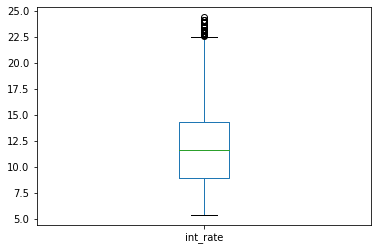

In [18]:
# Checking for any outilers
Loan_df['int_rate'].plot.box()

In [19]:
# grade values counts of each unique value in the given Series object
Loan_df['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

#### Let's see the quantile info and take an appropriate action.

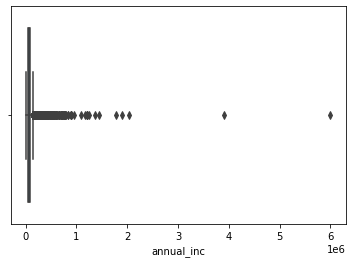

In [20]:
#plot the boxplot for the annual_inc to check for the outliner
sns.boxplot(x= Loan_df['annual_inc'])
plt.show()

#### In the boxplot the values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
So, considering threshold for removing outliers as 0.95

In [21]:
#checking quantile variation from 0.5 to 0.99
quantile_data =Loan_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_data

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [22]:
#considering 0.95 equal and below 
per_95_annual_inc = Loan_df.annual_inc.quantile(0.95)
Loan_df= Loan_df[Loan_df.annual_inc <= per_95_annual_inc]

<AxesSubplot:xlabel='annual_inc'>

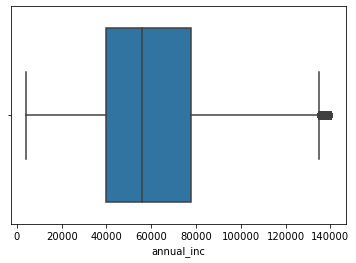

In [23]:
#boxplot of the annual_inc after removing quantile
sns.boxplot(x= Loan_df.annual_inc)

#### Checking for the Funded Amount Values

In [24]:
Loan_df.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8375.000000
0.750    13623.731415
0.900    19750.000000
0.950    23941.875589
0.970    24975.000000
0.975    25350.000000
0.980    27950.000000
0.985    29925.000000
0.990    31954.028576
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

<AxesSubplot:xlabel='funded_amnt_inv'>

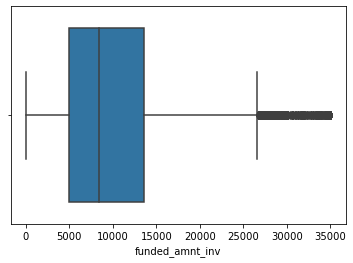

In [25]:
# Boxplot of fundedamount 
sns.boxplot(x=Loan_df.funded_amnt_inv)

<AxesSubplot:xlabel='dti'>

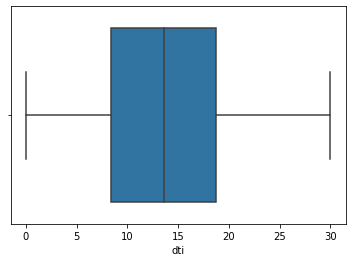

In [159]:
#Boxplot of the dti
sns.boxplot(x= Loan_df.dti)

<AxesSubplot:xlabel='loan_amnt'>

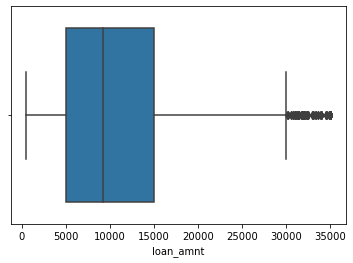

In [160]:
#Boxplot of the loan_amnt
sns.boxplot(x= Loan_df.loan_amnt)


#### In the above three plots are continous distribution . so there is no need to remove outliers for them 

In [26]:
#Cheking the grade count for the object
Loan_df['grade'].value_counts()

B    11097
A     9646
C     7481
D     4835
E     2448
F      886
G      261
Name: grade, dtype: int64

In [27]:

Loan_df.issue_d

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39711    Jul-07
39712    Jul-07
39713    Jul-07
39714    Jul-07
39716    Jun-07
Name: issue_d, Length: 36654, dtype: object

In [28]:
#Changing the formate of the issue_d
Loan_df.issue_d = pd.to_datetime(Loan_df.issue_d, format='%b-%y')

#### Deriving New Variables 
Creating new columns for issue_d month and issue_d Year values

In [29]:
Loan_df['issue_d_month'] = Loan_df.issue_d.dt.strftime('%b')
Loan_df['issue_d_year'] = Loan_df.issue_d.dt.year

In [30]:
#checking the column in added successfully or not
Loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,loan_status,purpose,title,dti,mths_since_last_delinq,mths_since_last_record,next_pymnt_d,pub_rec_bankruptcies,issue_d_month,issue_d_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,Fully Paid,credit_card,Computer,27.65,NaN,NaN,NaN,0.0,Dec,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,Charged Off,car,bike,1.00,NaN,NaN,NaN,0.0,Dec,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,Fully Paid,small_business,real estate business,8.72,NaN,NaN,NaN,0.0,Dec,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Fully Paid,other,personel,20.00,35.0,NaN,NaN,0.0,Dec,2011
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,Fully Paid,wedding,My wedding loan I promise to pay back,11.20,NaN,NaN,NaN,0.0,Dec,2011


### Univariate Analysis & Bivariate Analysis

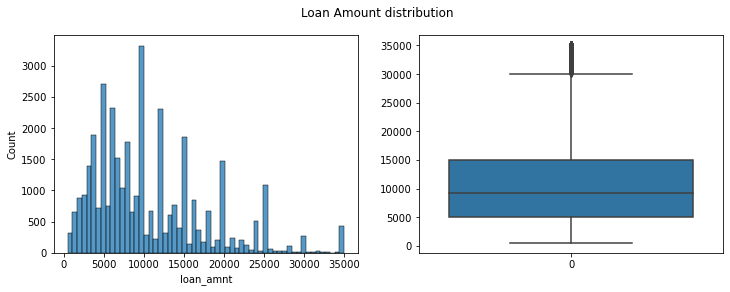

In [31]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.histplot (x=Loan_df.loan_amnt)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=Loan_df.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

In [32]:
#Stats of laon amount
Loan_df.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
5%        2250.000000
10%       3000.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
90%      20000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#### Observations:
From the above plots, more number of people took loan amount of 10000, and also meadian of distribution is 10000. And very few people took more than 30000 loan amount.


#### Univariate Analysis 

Text(0.5, 0.98, 'Funded Amount')

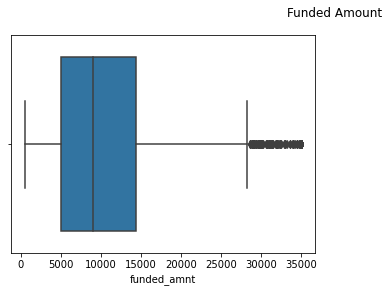

In [226]:
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x= Loan_df.funded_amnt)
plt.suptitle('Funded Amount')

#### Univariate Analysis

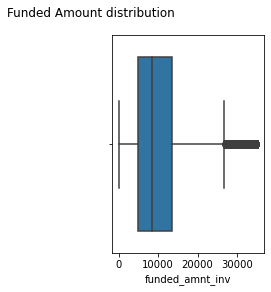

In [33]:
plt.subplot(1,2,2)
sns.boxplot(x= Loan_df.funded_amnt_inv)
plt.suptitle('Funded Amount distribution')
plt.show()

#### Observations:

From the above 
Funded amount investment data behaves similar to loan Amount, Which shows us that Lending club approved atmost of Applied loan amount.

#### Loan Status

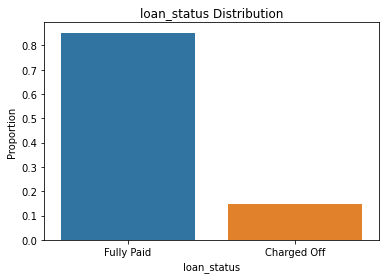

In [34]:
var = 'loan_status'
#Probability / Percentage of each values
prob_df = Loan_df[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observations:
85% of borrowers has paid the loan fully. where as 15% are defaulted the loan.

#### Annual Income

In [35]:
# Creating bins for annual income grouping
Loan_df['annual_inc_groups'] = pd.cut(Loan_df['annual_inc'], bins=5,precision =0,
                                   labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

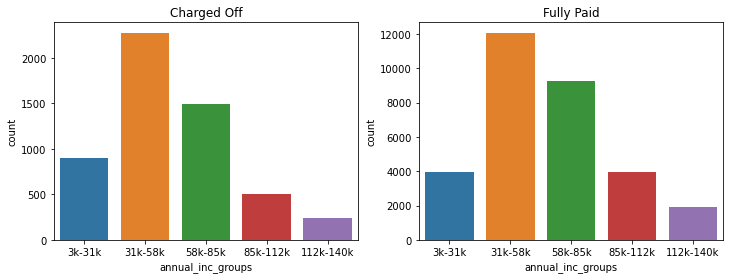

In [58]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x='annual_inc_groups', data=Loan_df[Loan_df.loan_status == 'Charged Off']  )
plt.title('Charged Off')
plt.subplot(1,2,2)
sns.countplot(x='annual_inc_groups', data=Loan_df[Loan_df.loan_status == 'Fully Paid'])
plt.title('Fully Paid')
plt.show()

#### Observations:
Borrowers having annual income around 31k-58k have charged off more than other ranges.


#### Grade

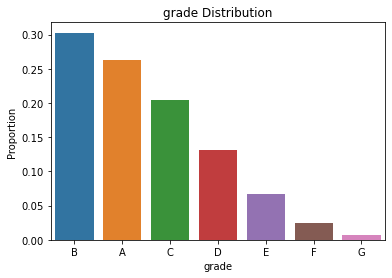

In [37]:
var = 'grade'
#Probability / Percentage of each values
prob_df = Loan_df[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observations:
Most borrowers fall under A and B grades then other grades

#### Sub Grade

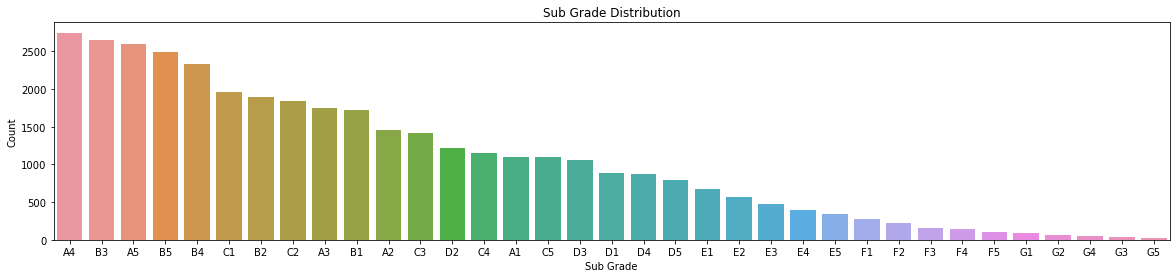

In [38]:
plt.figure(figsize=(20,4))
sns.countplot(x= Loan_df.sub_grade, order=Loan_df.sub_grade.value_counts().index)
plt.title('Sub Grade Distribution')
plt.xlabel('Sub Grade') 
plt.ylabel('Count')
plt.show()

In [39]:
#Loan.home_ownership = 
Loan_df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [40]:
#Loan.home_ownership = 
Loan_df.home_ownership.replace(to_replace ='NONE', value= 'OTHER', inplace =True)
Loan_df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

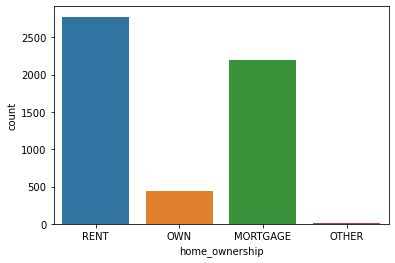

In [41]:
#chekcing the plot of charged off for the analysis
sns.countplot(x='home_ownership', data=Loan_df[Loan_df['loan_status']=='Charged Off'])
plt.show()

#### Observations:
The loan borrowers are mostly having rented and mortgage houses.

#### Purpose

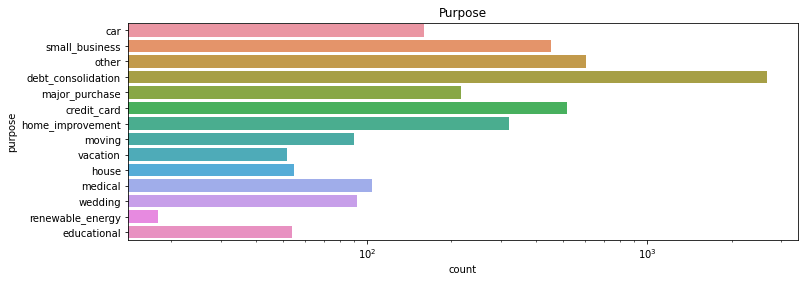

In [45]:
fig, ax = plt.subplots(figsize = (12,4))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=Loan_df[Loan_df['loan_status']=='Charged Off'])
plt.title('Purpose')
plt.show()

#### observations:
Looks line more number of people took loan for debt consolidation and a very few people took for renewable energy

#### Loan issue date (Month & Year)

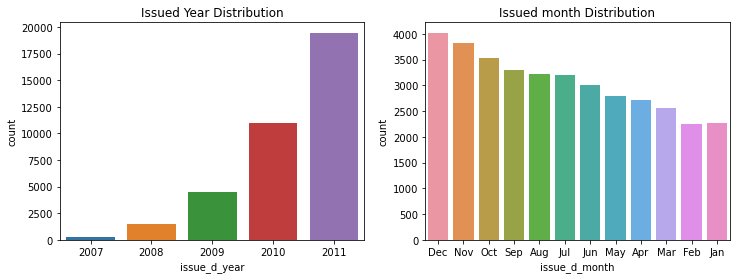

In [46]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x='issue_d_year', data=Loan_df )
plt.title('Issued Year Distribution')
plt.subplot(1,2,2)
sns.countplot(x='issue_d_month', data=Loan_df)
plt.title('Issued month Distribution')
plt.show()

#### Average of loan_amnt over time


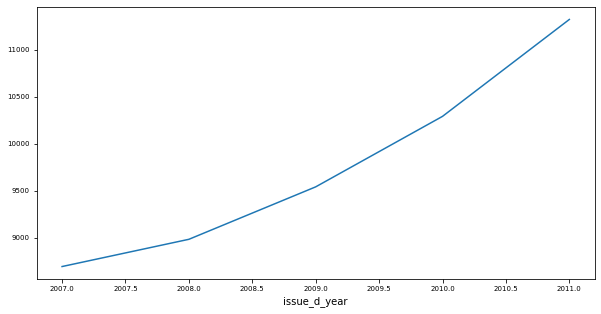

In [47]:
plt.figure(figsize=(10,5))
Loan_df.groupby('issue_d_year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()

#### Term vs Loan Amount

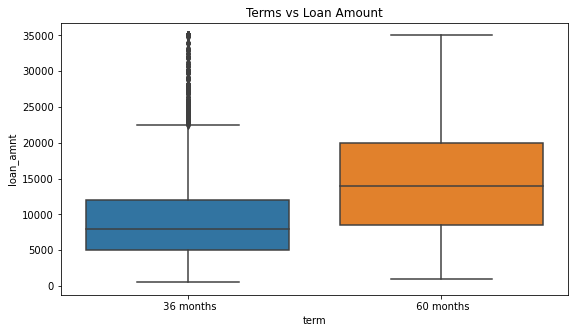

In [55]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=Loan_df.loan_amnt, data=Loan_df)
plt.title('Terms vs Loan Amount')
plt.show()

#### Observations
Higher amount loans have high tenure i.e,60 months.


#### Grade vs Loan Amount

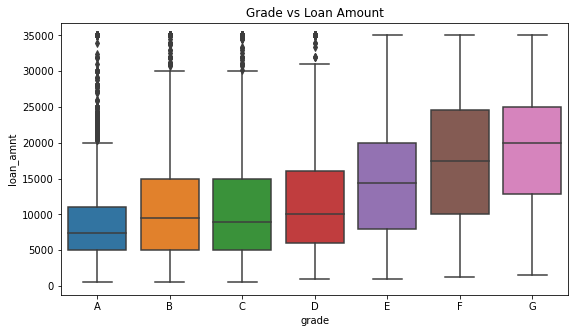

In [239]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Grade vs Loan Amount')
grade_ord = Loan_df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=Loan_df.loan_amnt, order = grade_ord, data=Loan_df)
plt.show()

###### Observations:
Grade 'G' and 'H' have taken max loan amount. As Grades are decreasing the loan amount is increasing.

#### Loan Status vs Loan Amount

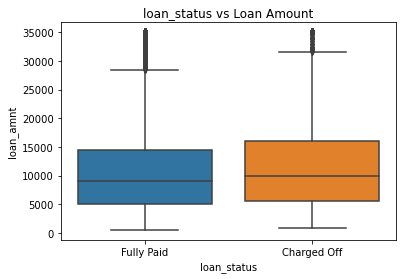

In [214]:
sns.boxplot(x='loan_status', y=Loan_df.loan_amnt, data=Loan_df)
plt.title('loan_status vs Loan Amount')
plt.show()

#### Observations:
Charged Off loans have higher amounts than Fully Paid ones.

#### Loan Status vs Public record Bankruptcies

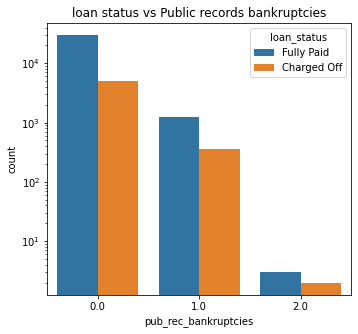

In [78]:
#Proportion of values for each category
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(Loan_df.pub_rec_bankruptcies, hue='loan_status', data=Loan_df)
plt.yscale('log')
plt.title('loan status vs Public records bankruptcies')
plt.show()

#### Issued Year vs Loan Amount & Issued Month vs Loan Amount

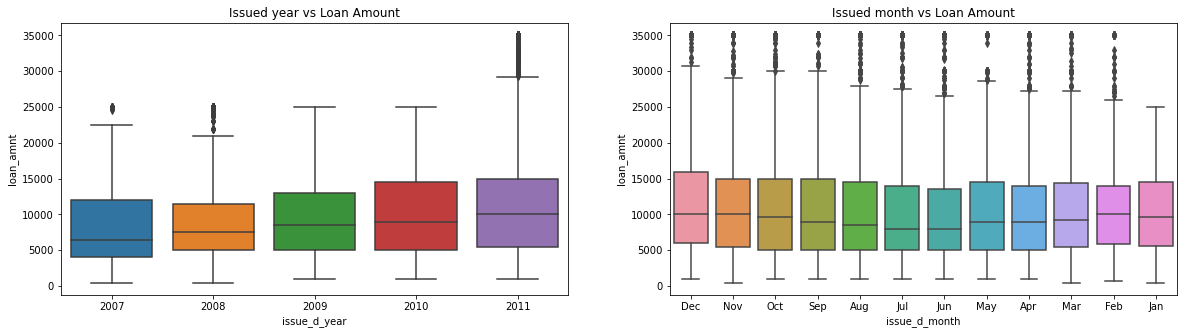

In [221]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=Loan_df.issue_d_year, y=Loan_df.loan_amnt, data=Loan_df)
plt.title('Issued year vs Loan Amount')
plt.subplot(122)
sns.boxplot(x=Loan_df.issue_d_month, y=Loan_df.loan_amnt, data=Loan_df)
plt.title('Issued month vs Loan Amount')
plt.show()

#### Observations:
From the above we have analysized that :
The median loan amount in each year didn't changed much but the distribution is more spreading as the years increase, which means people have taken different loan amounts in each year.
Few Loan borrowers took heigher loan amount in 2008 and 2011 which are plotted as outliers.
Loan borrowers took almost similar amounts in all the months except in December, people had taken heigher amounts as distribution is high above median.

#### Term vs Interest Rate and Grade vs Interest Rate


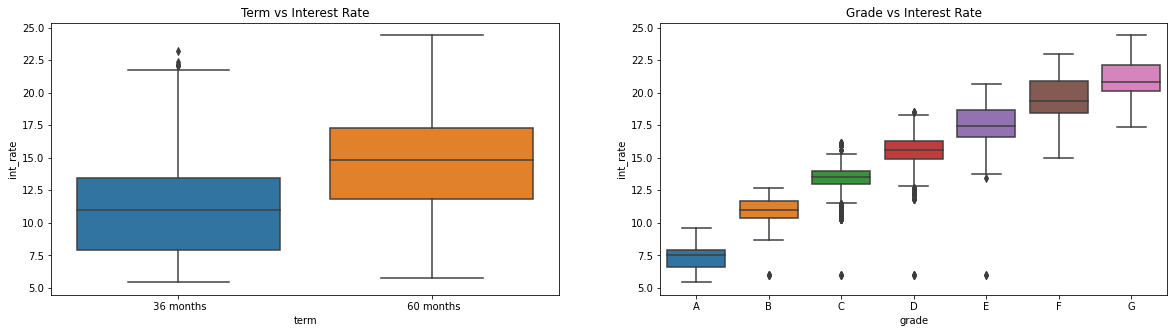

In [223]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=Loan_df.int_rate, data=Loan_df)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = Loan_df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=Loan_df.int_rate, order = grade_ord, data=Loan_df)
plt.show()

#### Observations:
The interest rates are higher for Higher tenure loans.
And Also Interest Rates are Higher as Grades are Lowering (A to G).

#### Term vs DTI and Grade vs DTI

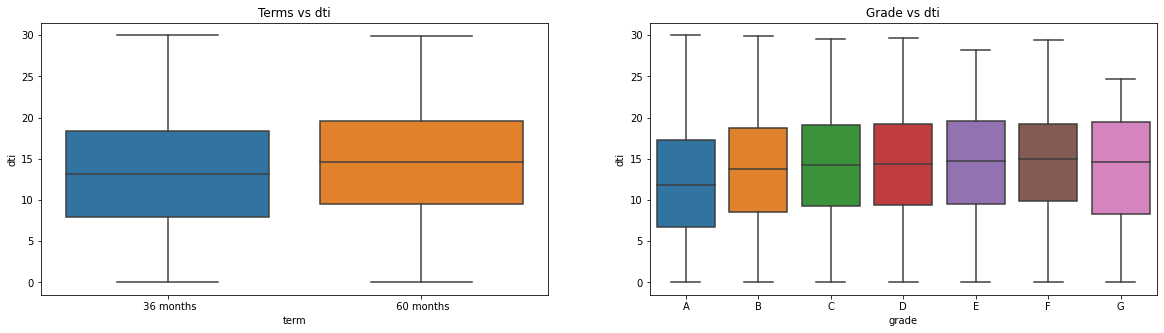

In [240]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=Loan_df.dti, data=Loan_df)
plt.title('Terms vs dti')
plt.subplot(122)
plt.title('Grade vs dti')
grade_ord = Loan_df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=Loan_df.dti, order = grade_ord, data=Loan_df)
plt.show()

#### Observations:
People in Other home ownership has less DTI than others. This is may be bacause other people have mortgage and home loans.

### Segmented Analysis

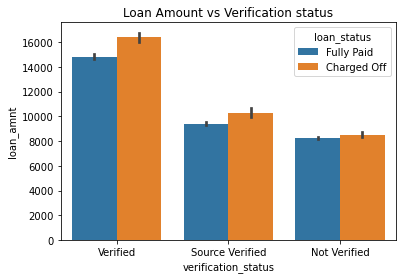

In [89]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=Loan_df, estimator=np.mean)
plt.title('Loan Amount vs Verification status')
plt.show()

#### Observation:
   Verified loans are given more loan amounts compared to others. There is a slight increase in loan amount for verified and source verified loan when they are defaulted.


#### Loan amount Vs term Vs Loan Status

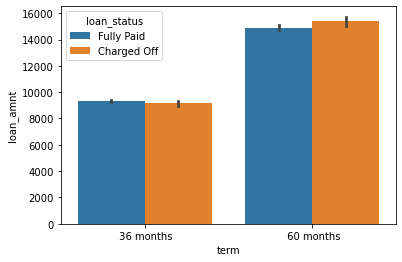

In [56]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=Loan_df, estimator=np.mean)
plt.show()

##### Observations:
When the Loan amount is around 15000 and tenure is 60 months people the Charged off percentage is higher

#### Annual Income Vs Purpose

In [244]:
#creating bins for int_rate,open_acc,revol_util,total_acc
Loan_df['int_rate_groups'] = pd.cut(Loan_df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
Loan_df['annual_inc_groups'] = pd.cut(Loan_df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

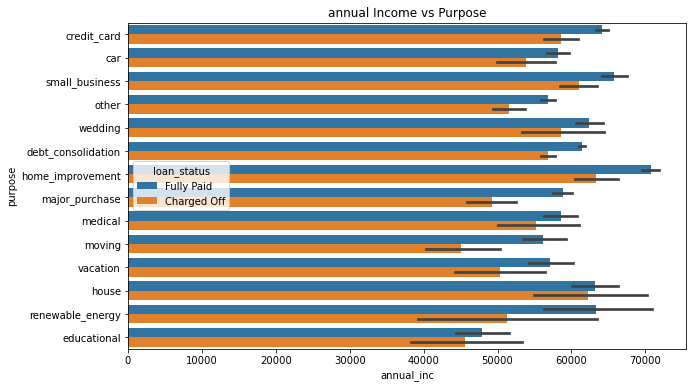

In [250]:
#plot the annual_inc , purpose and loan_status
plt.figure(figsize=(10,6))
sns.barplot(x='annual_inc', y='purpose', hue ='loan_status',data =Loan_df)
plt.title('annual Income vs Purpose')
plt.show()

#### Annual Income vs Loan amount

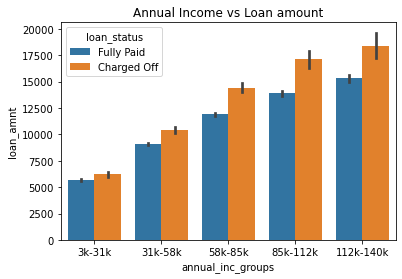

In [248]:
#barplot annual income vs loan amount
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = Loan_df)
plt.title('Annual Income vs Loan amount')
plt.show ()

#### Observations
- The Charged Off portion is higher in 112k to 140K annual income category

##### Annual Income vd Int_rate


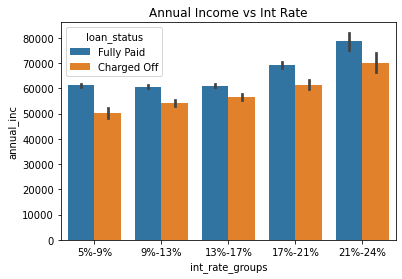

In [249]:
sns.barplot(x='int_rate_groups', y='annual_inc', hue ='loan_status',data =Loan_df)
plt.title('Annual Income vs Int Rate')
plt.show()

#### Observations
- Charged off loans are more in the interest rate of 21%-24% for annual income around 70 k category

#### Loan vs House Ownership

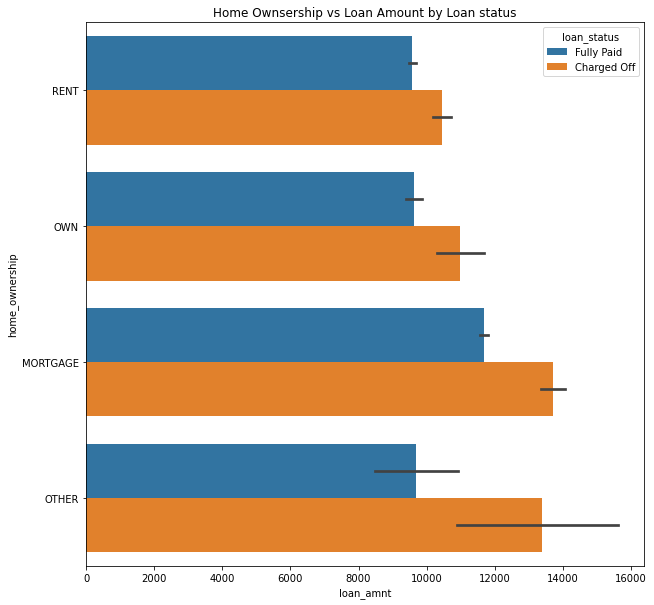

In [90]:
plt.figure(figsize=(10,10))
sns.barplot(data =Loan_df,x='loan_amnt', y='home_ownership', hue ='loan_status')
plt.title('Home Ownsership vs Loan Amount by Loan status')
plt.show()

##### Observations:
Applicants for the reson of Mortgage are more and they are more likey to be in default category.

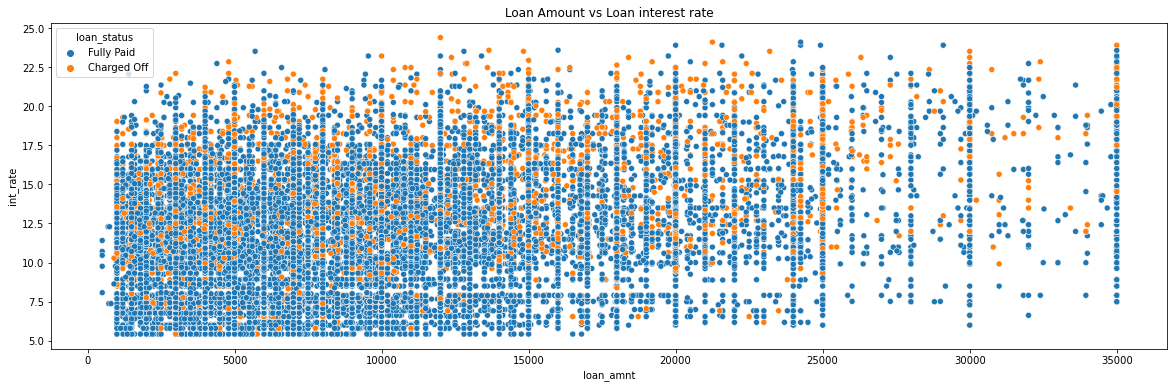

In [253]:
plt.figure(figsize=(20,6))
#scatter plot for analysing distribution
sns.scatterplot(x='loan_amnt', y='int_rate', hue='loan_status',data=Loan_df)
plt.title('Loan Amount vs Loan interest rate')
plt.show()

#### Observartions:
Values are pretty much spread accross all the space. There is not specific pattern found in the spread.

##### Observations
#### The above analysis with respect to the charged off loans. There is a more probability of defaulting when :

- Applicants taking loan for 'home improvement' and have income of 60k -70k 

- Applicants whose home ownership is 'MORTGAGE and have income of 60-70k

- Borrowers who receive interest at the rate of 21-24% and have an income of 70k-80k

- Borrowers who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5%

- Applicants who have taken a loan for small business and the loan amount is greater than 14k

- When grade is F and loan amount is between 15k-20k

- When the loan is verified and loan amount is above 16k

- For grade G and interest rate above 20%



- Reducing the high interest rate loans for 60 months tenure can add value as they are prone to loan default.

- Grades are good metric for detecting defaulters. Examining more information from borrowers before issuing loans to Lower grades.

- Borrowers with mortgage home ownership are taking higher loans which are defaulting the approved loans. lending clbd should stop giving loans to this category having loan amount more than 12000.

- People with more number of public derogatory records have more chances of filing bankruptcy. Better to make sure there no public derogatory records for borrowers.
